In [1]:
# Original Jupyter Notebook by David Koes

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
flfname = 'data/crossdocking-flex/cd-carlos-CNNrescore-e8-d3.5-LIG.csv'

flexlig = pd.read_csv(flfname).rename(columns={"rmsd": "rmsd_lig", "molids": "molids_lig"}).drop(columns="tag")
flexlig.pocket = flexlig.pocket.str.replace("/PDB_Structures/", "").str.strip() # Remove path from pocket name
flexlig

,molids_lig,rmsd_lig,cnnscore,cnnaffinity,minimizedAffinity,pocket,rec,lig
0,3EML_ZMA_A_401:3EML_ZMA_A_401,6.98059,0.842898,7.073944,-10.30702,AA2AR,3QAK,3EML
1,3EML_ZMA_A_401:3EML_ZMA_A_401,7.21039,0.833297,0.357896,-10.99423,AA2AR,3QAK,3EML
2,3EML_ZMA_A_401:3EML_ZMA_A_401,9.08965,0.782344,7.130491,-9.69798,AA2AR,3QAK,3EML
3,3EML_ZMA_A_401:3EML_ZMA_A_401,9.29061,0.762929,0.198129,-9.99973,AA2AR,3QAK,3EML
4,3EML_ZMA_A_401:3EML_ZMA_A_401,6.13753,0.748435,6.971288,-10.31872,AA2AR,3QAK,3EML
...,...,...,...,...,...,...,...,...
81277,5C7A_4YE_A_402:5C7A_4YE_A_402,10.32820,0.529529,0.581109,-5.59953,XIAP,3G76,5C7A
81278,5C7A_4YE_A_402:5C7A_4YE_A_402,10.34450,0.529444,4.382333,-6.96083,XIAP,3G76,5C7A
81279,5C7A_4YE_A_402:5C7A_4YE_A_402,17.66560,0.486497,0.470185,-6.47080,XIAP,3G76,5C7A
81280,5C7A_4YE_A_402:5C7A_4YE_A_402,8.90836,0.465802,4.023231,-6.71381,XIAP,3G76,5C7A


In [5]:
frfname = 'data/crossdocking-flex/cd-carlos-CNNrescore-e8-d3.5-FLEX.csv'

flexrec = pd.read_csv(frfname).rename(columns={"rmsd": "rmsd_rec", "molids": "molids_rec"}).drop(columns="tag")
flexrec.pocket = flexrec.pocket.str.replace("/PDB_Structures/", "").str.strip() # Remove path from pocket name
#flexrec = flexrec.rename(columns={"pocket": "pocket_rec", "lig": "lig_rec", "rec": "rec_rec"})

flexrec

,molids_rec,rmsd_rec,pocket,rec,lig
0,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.38707,AA2AR,3QAK,3EML
1,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.52698,AA2AR,3QAK,3EML
2,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.41695,AA2AR,3QAK,3EML
3,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.60430,AA2AR,3QAK,3EML
4,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.41815,AA2AR,3QAK,3EML
...,...,...,...,...,...
81007,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...,1.85098,XIAP,3G76,5C7A
81008,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...,2.25624,XIAP,3G76,5C7A
81009,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...,2.17718,XIAP,3G76,5C7A
81010,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...,1.28246,XIAP,3G76,5C7A


In [6]:
# Load data for rigid docking
# Data from Paul

rigid= pd.read_csv('data/crossdocking-flex/final_def_ensemble_rescore_defaults.csv')
rigid.rec = rigid.rec.str.slice(-4).str.strip() # Remove path from rec name
rigid.pocket = rigid.pocket.str.replace("/PDB_Structures/", "").str.strip() # Remove path from pocket name

rigid

,tag,molids,rmsd,cnnscore,cnnaffinity,minimizedAffinity,pocket,rec,lig
0,defaults,3QAK_UKA_A_1200:3QAK_UKA_A_1200,12.11020,0.301147,7.290389,-10.66544,AA2AR,3EML,3QAK
1,defaults,3QAK_UKA_A_1200:3QAK_UKA_A_1200,12.50650,0.208695,0.537906,-9.09964,AA2AR,3EML,3QAK
2,defaults,3QAK_UKA_A_1200:3QAK_UKA_A_1200,13.18390,0.184682,6.905550,-10.15615,AA2AR,3EML,3QAK
3,defaults,3QAK_UKA_A_1200:3QAK_UKA_A_1200,12.54770,0.182141,0.102756,-8.79749,AA2AR,3EML,3QAK
4,defaults,3QAK_UKA_A_1200:3QAK_UKA_A_1200,10.77710,0.176975,6.870663,-10.63542,AA2AR,3EML,3QAK
...,...,...,...,...,...,...,...,...,...
73154,defaults,5C3K_4XF_A_402:5C3K_4XF_A_402,5.74781,0.634539,3.836325,-5.31584,XIAP,3G76,5C3K
73155,defaults,5C3K_4XF_A_402:5C3K_4XF_A_402,5.43635,0.619502,0.129123,-5.06683,XIAP,3G76,5C3K
73156,defaults,5C3K_4XF_A_402:5C3K_4XF_A_402,8.00052,0.591508,3.458242,-4.41025,XIAP,3G76,5C3K
73157,defaults,5C3K_4XF_A_402:5C3K_4XF_A_402,10.20340,0.567792,0.314778,-5.61288,XIAP,3G76,5C3K


`flexlig` and `flexrec` have a different number of rows. This is likely due to systems were no flexible residues were identified. In order to find such systems, the overlap between `rigid` and `flexlig` and `flexrec` can be computed.

In [7]:
# Identify possible differences between rigid and flexible docking
rigidgen = ((p, l, r) for p, l, r in zip(rigid.pocket, rigid.lig, rigid.rec))
flexRgen = ((p, l, r) for p, l, r in zip(flexrec.pocket, flexrec.lig, flexrec.rec))
flexLgen = ((p, l, r) for p, l, r in zip(flexlig.pocket, flexlig.lig, flexlig.rec))

rigidset = set(rigidgen)
flexRset = set(flexRgen)
flexLset = set(flexLgen)

assert len(rigidset) == len(flexLset) == 8132
print(len(flexRset))
print(len(rigidset) - len(flexRset))

assert rigidset - flexRset == flexLset - flexRset

flexfail = rigidset - flexRset
flexfail

8105
27


{('ACES', '1ACJ', '1JJB'),
 ('ACES', '1ZGB', '1JJB'),
 ('ACES', '2CMF', '1JJB'),
 ('ALDR', '1ADS', '1ABN'),
 ('ALDR', '2HV5', '1ABN'),
 ('CDK2', '3IG7', '3QQJ'),
 ('HIVPR', '1HWR', '1PRO'),
 ('IGF1R', '1JQH', '5FXR'),
 ('IGF1R', '2OJ9', '5FXR'),
 ('IGF1R', '2ZM3', '5FXR'),
 ('IGF1R', '3LVP', '5FXR'),
 ('IGF1R', '3NW6', '5FXR'),
 ('IGF1R', '3NW7', '5FXR'),
 ('JAK2', '4D0W', '4F08'),
 ('JAK2', '4E4M', '4F08'),
 ('JAK2', '5CF6', '4F08'),
 ('MK01', '4FV2', '4GSB'),
 ('MK01', '4ZZM', '4GSB'),
 ('MK01', '5LCJ', '4GSB'),
 ('MK01', '5NHV', '4GSB'),
 ('MK10', '2G01', '1UKI'),
 ('MK10', '3ELJ', '1UKI'),
 ('MK10', '3RTP', '1UKI'),
 ('MK10', '4L7F', '4HYS'),
 ('SRC', '3DQX', '3UQG'),
 ('SRC', '5D10', '3UQG'),
 ('SRC', '5J5S', '3UQG')}

In [8]:
# Remove systems without flexible RMSD from both flexlig and rigid
failpockets = np.array(list(set(p for p, _, _ in flexfail)))
failligs = np.array(list(set(l for _, l, _ in flexfail)))
failrecs = np.array(list(set(r for _, _, r in flexfail)))

flexlig = flexlig[~(np.isin(flexlig.pocket.to_numpy(), failpockets) & np.isin(flexlig.lig.to_numpy(), failligs) & np.isin(flexlig.rec.to_numpy(), failrecs))]

rigid = rigid[~(np.isin(rigid.pocket.to_numpy(), failpockets) & np.isin(rigid.lig.to_numpy(), failligs) & np.isin(rigid.rec.to_numpy(), failrecs))]

assert len(flexlig) == len(flexrec)
print(len(flexlig), len(flexrec))

81012 81012


In [9]:
# Generate paths to GNINA log files for easy checks
for p, l, r in flexfail:
    print(f"carlos_cd/{p}/PDB_Structures/{l}_LIG_aligned-{r}_PRO-gnina.log \\")

carlos_cd/SRC/PDB_Structures/5D10_LIG_aligned-3UQG_PRO-gnina.log \
carlos_cd/MK10/PDB_Structures/3ELJ_LIG_aligned-1UKI_PRO-gnina.log \
carlos_cd/MK01/PDB_Structures/5LCJ_LIG_aligned-4GSB_PRO-gnina.log \
carlos_cd/MK10/PDB_Structures/2G01_LIG_aligned-1UKI_PRO-gnina.log \
carlos_cd/IGF1R/PDB_Structures/2OJ9_LIG_aligned-5FXR_PRO-gnina.log \
carlos_cd/MK01/PDB_Structures/5NHV_LIG_aligned-4GSB_PRO-gnina.log \
carlos_cd/IGF1R/PDB_Structures/3LVP_LIG_aligned-5FXR_PRO-gnina.log \
carlos_cd/HIVPR/PDB_Structures/1HWR_LIG_aligned-1PRO_PRO-gnina.log \
carlos_cd/MK10/PDB_Structures/3RTP_LIG_aligned-1UKI_PRO-gnina.log \
carlos_cd/ACES/PDB_Structures/2CMF_LIG_aligned-1JJB_PRO-gnina.log \
carlos_cd/MK01/PDB_Structures/4FV2_LIG_aligned-4GSB_PRO-gnina.log \
carlos_cd/IGF1R/PDB_Structures/3NW6_LIG_aligned-5FXR_PRO-gnina.log \
carlos_cd/JAK2/PDB_Structures/4E4M_LIG_aligned-4F08_PRO-gnina.log \
carlos_cd/SRC/PDB_Structures/3DQX_LIG_aligned-3UQG_PRO-gnina.log \
carlos_cd/ACES/PDB_Structures/1ACJ_LIG_aligned

In [10]:
# Reindex flexlig as flexrec
# Otherwise concatenation will add NaNs where indices do not match
flexlig.reset_index(inplace=True, drop=True)
flexlig["pose"] = flexlig.groupby(["pocket", "lig", "rec"]).cumcount()
flexlig

,molids_lig,rmsd_lig,cnnscore,cnnaffinity,minimizedAffinity,pocket,rec,lig,pose
0,3EML_ZMA_A_401:3EML_ZMA_A_401,6.98059,0.842898,7.073944,-10.30702,AA2AR,3QAK,3EML,0
1,3EML_ZMA_A_401:3EML_ZMA_A_401,7.21039,0.833297,0.357896,-10.99423,AA2AR,3QAK,3EML,1
2,3EML_ZMA_A_401:3EML_ZMA_A_401,9.08965,0.782344,7.130491,-9.69798,AA2AR,3QAK,3EML,2
3,3EML_ZMA_A_401:3EML_ZMA_A_401,9.29061,0.762929,0.198129,-9.99973,AA2AR,3QAK,3EML,3
4,3EML_ZMA_A_401:3EML_ZMA_A_401,6.13753,0.748435,6.971288,-10.31872,AA2AR,3QAK,3EML,4
...,...,...,...,...,...,...,...,...,...
81007,5C7A_4YE_A_402:5C7A_4YE_A_402,10.32820,0.529529,0.581109,-5.59953,XIAP,3G76,5C7A,5
81008,5C7A_4YE_A_402:5C7A_4YE_A_402,10.34450,0.529444,4.382333,-6.96083,XIAP,3G76,5C7A,6
81009,5C7A_4YE_A_402:5C7A_4YE_A_402,17.66560,0.486497,0.470185,-6.47080,XIAP,3G76,5C7A,7
81010,5C7A_4YE_A_402:5C7A_4YE_A_402,8.90836,0.465802,4.023231,-6.71381,XIAP,3G76,5C7A,8


In [11]:
flexrec.reset_index(inplace=True, drop=True)
flexrec["pose"] = flexrec.groupby(["pocket", "lig", "rec"]).cumcount()
flexrec

,molids_rec,rmsd_rec,pocket,rec,lig,pose
0,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.38707,AA2AR,3QAK,3EML,0
1,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.52698,AA2AR,3QAK,3EML,1
2,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.41695,AA2AR,3QAK,3EML,2
3,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.60430,AA2AR,3QAK,3EML,3
4,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.41815,AA2AR,3QAK,3EML,4
...,...,...,...,...,...,...
81007,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...,1.85098,XIAP,3G76,5C7A,5
81008,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...,2.25624,XIAP,3G76,5C7A,6
81009,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...,2.17718,XIAP,3G76,5C7A,7
81010,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...,1.28246,XIAP,3G76,5C7A,8


In [12]:
# Merge LIG and FLEX data into a single dataframe

flex = pd.merge(flexlig, flexrec, how="left", on=["pocket", "lig", "rec", "pose"], suffixes=['_lig','_rec'])

assert len(flex) == len(flexlig) == len(flexrec)

flex

,molids_lig,rmsd_lig,cnnscore,cnnaffinity,minimizedAffinity,pocket,rec,lig,pose,molids_rec,rmsd_rec
0,3EML_ZMA_A_401:3EML_ZMA_A_401,6.98059,0.842898,7.073944,-10.30702,AA2AR,3QAK,3EML,0,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.38707
1,3EML_ZMA_A_401:3EML_ZMA_A_401,7.21039,0.833297,0.357896,-10.99423,AA2AR,3QAK,3EML,1,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.52698
2,3EML_ZMA_A_401:3EML_ZMA_A_401,9.08965,0.782344,7.130491,-9.69798,AA2AR,3QAK,3EML,2,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.41695
3,3EML_ZMA_A_401:3EML_ZMA_A_401,9.29061,0.762929,0.198129,-9.99973,AA2AR,3QAK,3EML,3,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.60430
4,3EML_ZMA_A_401:3EML_ZMA_A_401,6.13753,0.748435,6.971288,-10.31872,AA2AR,3QAK,3EML,4,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...,1.41815
...,...,...,...,...,...,...,...,...,...,...,...
81007,5C7A_4YE_A_402:5C7A_4YE_A_402,10.32820,0.529529,0.581109,-5.59953,XIAP,3G76,5C7A,5,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...,1.85098
81008,5C7A_4YE_A_402:5C7A_4YE_A_402,10.34450,0.529444,4.382333,-6.96083,XIAP,3G76,5C7A,6,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...,2.25624
81009,5C7A_4YE_A_402:5C7A_4YE_A_402,17.66560,0.486497,0.470185,-6.47080,XIAP,3G76,5C7A,7,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...,2.17718
81010,5C7A_4YE_A_402:5C7A_4YE_A_402,8.90836,0.465802,4.023231,-6.71381,XIAP,3G76,5C7A,8,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...,1.28246


In [13]:
# Add pose column to rigid results as well
rigid["pose"] = rigid.groupby(["pocket", "lig", "rec"]).cumcount()

In [14]:
bestrigid = rigid.loc[rigid.groupby(['rec','lig'])['cnnscore'].idxmax()]
bestrigid.rec = bestrigid.rec.str.slice(-4) # Remove path from rec name
bestrigid.pocket = bestrigid.pocket.str.replace("/PDB_Structures/", "") # Remove path from pocket name

assert (bestrigid.pose == 0).all() # Check cumcount worked as expected

bestrigid

,tag,molids,rmsd,cnnscore,cnnaffinity,minimizedAffinity,pocket,rec,lig,pose
68245,defaults,2BM2_PM2_A_3211:2BM2_PM2_A_3211,8.33442,0.817750,6.368227,-7.80791,TRYB1,1A0L,2BM2,0
68290,defaults,2FS8_C3A_A_999:2FS8_C3A_A_999,5.85429,0.653781,6.623601,-7.45945,TRYB1,1A0L,2FS8,0
68299,defaults,2FS9_C4A_A_999:2FS9_C4A_A_999,7.00359,0.860233,6.747996,-7.69461,TRYB1,1A0L,2FS9,0
68263,defaults,2FWW_C1R_A_999:2FWW_C1R_A_999,3.67590,0.815322,4.276328,-3.64784,TRYB1,1A0L,2FWW,0
68254,defaults,2GDD_5AM_A_999:2GDD_5AM_A_999,6.73602,0.746444,6.630740,-7.65218,TRYB1,1A0L,2GDD,0
...,...,...,...,...,...,...,...,...,...,...
59353,defaults,1GFZ_CFF_A_940:1GFZ_CFF_A_940,3.18050,0.972332,4.049852,-5.71322,PYGM,8GPB,1GFZ,0
59380,defaults,3BCR_AZZ_A_940:3BCR_AZZ_A_940,3.77919,0.866755,5.027512,-7.60498,PYGM,8GPB,3BCR,0
59389,defaults,3BD7_CKB_A_940:3BD7_CKB_A_940,3.50473,0.770555,3.740147,-5.91701,PYGM,8GPB,3BD7,0
59362,defaults,3BDA_C4B_A_940:3BDA_C4B_A_940,5.39942,0.782247,3.579218,-6.26254,PYGM,8GPB,3BDA,0


In [15]:
bestflex = flex.loc[flex.groupby(['rec','lig'])['cnnscore'].idxmax()]

assert (bestflex.pose == 0).all() # Check cumcount worked as expected

bestflex

,molids_lig,rmsd_lig,cnnscore,cnnaffinity,minimizedAffinity,pocket,rec,lig,pose,molids_rec,rmsd_rec
75856,2BM2_PM2_A_3211:2BM2_PM2_A_3211,9.97324,0.844044,6.477723,-8.24964,TRYB1,1A0L,2BM2,0,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...,2.105340
75456,2FS8_C3A_A_999:2FS8_C3A_A_999,5.96008,0.710734,7.047270,-8.51859,TRYB1,1A0L,2FS8,0,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...,2.209090
75416,2FS9_C4A_A_999:2FS9_C4A_A_999,6.09921,0.716898,6.308069,-6.77750,TRYB1,1A0L,2FS9,0,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...,2.115250
75366,2FWW_C1R_A_999:2FWW_C1R_A_999,1.47165,0.934818,4.889133,-4.90269,TRYB1,1A0L,2FWW,0,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...,2.166480
75896,2GDD_5AM_A_999:2GDD_5AM_A_999,7.32848,0.865685,7.190760,-7.46226,TRYB1,1A0L,2GDD,0,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...,2.144200
...,...,...,...,...,...,...,...,...,...,...,...
65658,1GFZ_CFF_A_940:1GFZ_CFF_A_940,3.77464,0.943478,4.039353,-6.61969,PYGM,8GPB,1GFZ,0,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...,0.745710
65748,3BCR_AZZ_A_940:3BCR_AZZ_A_940,4.71739,0.768314,5.049916,-8.20208,PYGM,8GPB,3BCR,0,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...,0.748123
65758,3BD7_CKB_A_940:3BD7_CKB_A_940,5.51334,0.861324,4.201993,-9.08778,PYGM,8GPB,3BD7,0,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...,0.756820
65688,3BDA_C4B_A_940:3BDA_C4B_A_940,4.75390,0.510179,3.681571,-6.31240,PYGM,8GPB,3BDA,0,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...,1.920210


In [16]:
assert len(bestrigid) == len(bestflex)

In [17]:
# Combine rigid and flexible docking results for analysis
combined = pd.merge(bestrigid, bestflex, how='inner', on=['rec','lig', "pocket", "pose"], suffixes=['_rigid','_flex'])

assert len(combined) == len(bestflex)

combined

,tag,molids,rmsd,cnnscore_rigid,cnnaffinity_rigid,minimizedAffinity_rigid,pocket,rec,lig,pose,molids_lig,rmsd_lig,cnnscore_flex,cnnaffinity_flex,minimizedAffinity_flex,molids_rec,rmsd_rec
0,defaults,2BM2_PM2_A_3211:2BM2_PM2_A_3211,8.33442,0.817750,6.368227,-7.80791,TRYB1,1A0L,2BM2,0,2BM2_PM2_A_3211:2BM2_PM2_A_3211,9.97324,0.844044,6.477723,-8.24964,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...,2.105340
1,defaults,2FS8_C3A_A_999:2FS8_C3A_A_999,5.85429,0.653781,6.623601,-7.45945,TRYB1,1A0L,2FS8,0,2FS8_C3A_A_999:2FS8_C3A_A_999,5.96008,0.710734,7.047270,-8.51859,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...,2.209090
2,defaults,2FS9_C4A_A_999:2FS9_C4A_A_999,7.00359,0.860233,6.747996,-7.69461,TRYB1,1A0L,2FS9,0,2FS9_C4A_A_999:2FS9_C4A_A_999,6.09921,0.716898,6.308069,-6.77750,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...,2.115250
3,defaults,2FWW_C1R_A_999:2FWW_C1R_A_999,3.67590,0.815322,4.276328,-3.64784,TRYB1,1A0L,2FWW,0,2FWW_C1R_A_999:2FWW_C1R_A_999,1.47165,0.934818,4.889133,-4.90269,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...,2.166480
4,defaults,2GDD_5AM_A_999:2GDD_5AM_A_999,6.73602,0.746444,6.630740,-7.65218,TRYB1,1A0L,2GDD,0,2GDD_5AM_A_999:2GDD_5AM_A_999,7.32848,0.865685,7.190760,-7.46226,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...,2.144200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8100,defaults,1GFZ_CFF_A_940:1GFZ_CFF_A_940,3.18050,0.972332,4.049852,-5.71322,PYGM,8GPB,1GFZ,0,1GFZ_CFF_A_940:1GFZ_CFF_A_940,3.77464,0.943478,4.039353,-6.61969,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...,0.745710
8101,defaults,3BCR_AZZ_A_940:3BCR_AZZ_A_940,3.77919,0.866755,5.027512,-7.60498,PYGM,8GPB,3BCR,0,3BCR_AZZ_A_940:3BCR_AZZ_A_940,4.71739,0.768314,5.049916,-8.20208,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...,0.748123
8102,defaults,3BD7_CKB_A_940:3BD7_CKB_A_940,3.50473,0.770555,3.740147,-5.91701,PYGM,8GPB,3BD7,0,3BD7_CKB_A_940:3BD7_CKB_A_940,5.51334,0.861324,4.201993,-9.08778,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...,0.756820
8103,defaults,3BDA_C4B_A_940:3BDA_C4B_A_940,5.39942,0.782247,3.579218,-6.26254,PYGM,8GPB,3BDA,0,3BDA_C4B_A_940:3BDA_C4B_A_940,4.75390,0.510179,3.681571,-6.31240,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...,1.920210


In [18]:
combined = combined.replace([np.inf, -np.inf], np.nan)

In [19]:
combined.rmsd.isnull().sum()

0

In [20]:
combined.rmsd_lig.isnull().sum()

0

In [21]:
combined.rmsd_rec.isnull().sum()

9

In [22]:
combined.loc[combined.rmsd_rec.isnull()]

,tag,molids,rmsd,cnnscore_rigid,cnnaffinity_rigid,minimizedAffinity_rigid,pocket,rec,lig,pose,molids_lig,rmsd_lig,cnnscore_flex,cnnaffinity_flex,minimizedAffinity_flex,molids_rec,rmsd_rec
619,defaults,2RA0_JNJ_A_1:2RA0_JNJ_A_1,1.37178,0.967965,8.057706,-10.81533,FA10,1IQE,2RA0,0,2RA0_JNJ_A_1:2RA0_JNJ_A_1,1.12631,0.896387,7.822534,-11.61374,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/FA10/PD...,NaN
620,defaults,3KQB_LGJ_A_301:3KQB_LGJ_A_301,1.55122,0.783398,7.703771,-12.79677,FA10,1IQE,3KQB,0,3KQB_LGJ_A_301:3KQB_LGJ_A_301,1.73781,0.691087,7.547536,-13.28600,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/FA10/PD...,NaN
1231,defaults,5W0C_9W6_A_501:5W0C_9W6_A_501,7.21724,0.553964,5.985719,-4.83973,CP2C9,1R9O,5W0C,0,5W0C_9W6_A_501:5W0C_9W6_A_501,5.36476,0.693793,5.735137,15.10261,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/CP2C9/P...,NaN
3178,defaults,2FZZ_5QC_A_1:2FZZ_5QC_A_1,1.08023,0.984034,8.201651,-13.34424,FA10,2XBV,2FZZ,0,2FZZ_5QC_A_1:2FZZ_5QC_A_1,1.43551,0.969914,8.272442,-14.51439,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/FA10/PD...,NaN
3179,defaults,2Y82_930_A_1245:2Y82_930_A_1245,2.63931,0.554174,6.928076,-8.77764,FA10,2XBV,2Y82,0,2Y82_930_A_1245:2Y82_930_A_1245,3.67225,0.852857,7.117783,-9.23860,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/FA10/PD...,NaN
5978,defaults,1X88_NAT_A_801:1X88_NAT_A_801,6.25193,0.556522,3.981334,-5.19176,KIF11,4BXN,1X88,0,1X88_NAT_A_801:1X88_NAT_A_801,4.19534,0.778364,5.871177,-7.96047,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/KIF11/P...,NaN
5979,defaults,2IEH_MOY_A_602:2IEH_MOY_A_602,6.39565,0.643247,4.505963,-7.19696,KIF11,4BXN,2IEH,0,2IEH_MOY_A_602:2IEH_MOY_A_602,5.32995,0.661507,6.043282,-8.78048,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/KIF11/P...,NaN
5980,defaults,2X7D_EGB_A_1369:2X7D_EGB_A_1369,6.26609,0.591287,4.267475,-5.67960,KIF11,4BXN,2X7D,0,2X7D_EGB_A_1369:2X7D_EGB_A_1369,6.35282,0.746082,5.839588,-10.29091,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/KIF11/P...,NaN
5981,defaults,3K3B_L31_A_371:3K3B_L31_A_371,9.09487,0.638428,4.833274,-4.51328,KIF11,4BXN,3K3B,0,3K3B_L31_A_371:3K3B_L31_A_371,2.29230,0.693233,6.314242,-11.55596,cd-carlos-CNNrescore-e8-d3.5/carlos_cd/KIF11/P...,NaN


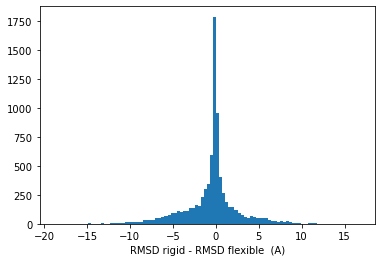

In [23]:
combined['rmsdiff'] = combined.rmsd - combined.rmsd_lig
plt.hist(combined.rmsdiff, bins=100);
plt.xlabel("RMSD rigid - RMSD flexible  (A)")
plt.savefig("figures/crossdocking-flex/rmsd-diff_hist.pdf")

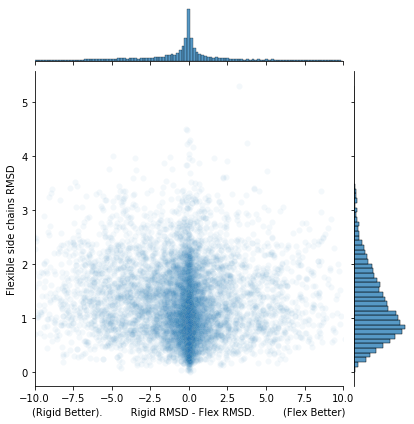

In [24]:
D = combined.dropna()

h = sns.jointplot(data=D, x='rmsdiff', y='rmsd_rec', xlim=(-10,10), alpha=.05)
h.ax_joint.set_xlabel('(Rigid Better)         Rigid RMSD - Flex RMSD         (Flex Better)')
h.ax_joint.set_ylabel('Flexible side chains RMSD')
plt.savefig("figures/crossdocking-flex/rmsd-diff_vs_side-chain-rmsd.pdf")

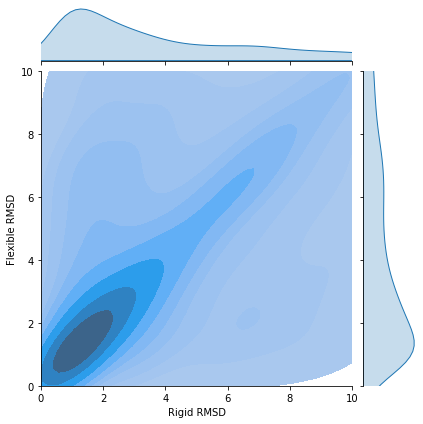

In [25]:
h = sns.jointplot(data=D, x='rmsd',y='rmsd_lig',kind='kde',ylim=(0,10),xlim=(0,10), fill=True)
h.ax_joint.set_xlabel('Rigid RMSD')
h.ax_joint.set_ylabel('Flexible RMSD')
plt.savefig("figures/crossdocking-flex/rmsd-flex_vs_rmsd-rigid_corr.pdf")

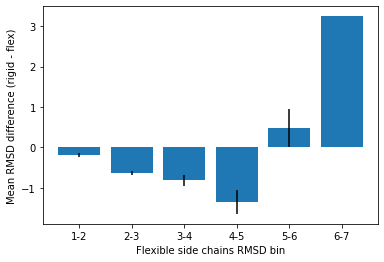

In [29]:
cuts = pd.cut(D.rmsd_rec, range(0,10,1))
C = D.groupby([cuts])

fig, ax = plt.subplots()
ax.bar(list(range(1,10,1)),C.mean().rmsdiff.to_numpy(), yerr=C.sem().rmsdiff)
ax.set_xlabel('Flexible side chains RMSD bin')
ax.set_xticklabels(labels=[f"{i}-{i+1}" for i in range(0,10,1)])
ax.set_ylabel('Mean RMSD difference (rigid - flex)')
plt.savefig("figures/crossdocking-flex/mean-diff-rmsd_vs_flex-rmsd-bin_hist.pdf")